              precision    recall  f1-score   support

           0       0.56      0.68      0.62       953
           1       0.75      0.76      0.76       753
           2       0.64      0.64      0.64       894
           3       0.85      0.92      0.88       963
           4       0.99      1.00      0.99      1157
           5       0.54      0.41      0.46       743
           6       0.52      0.45      0.48       765

    accuracy                           0.72      6228
   macro avg       0.69      0.69      0.69      6228
weighted avg       0.71      0.72      0.71      6228

Accuracy: 0.718529222864483


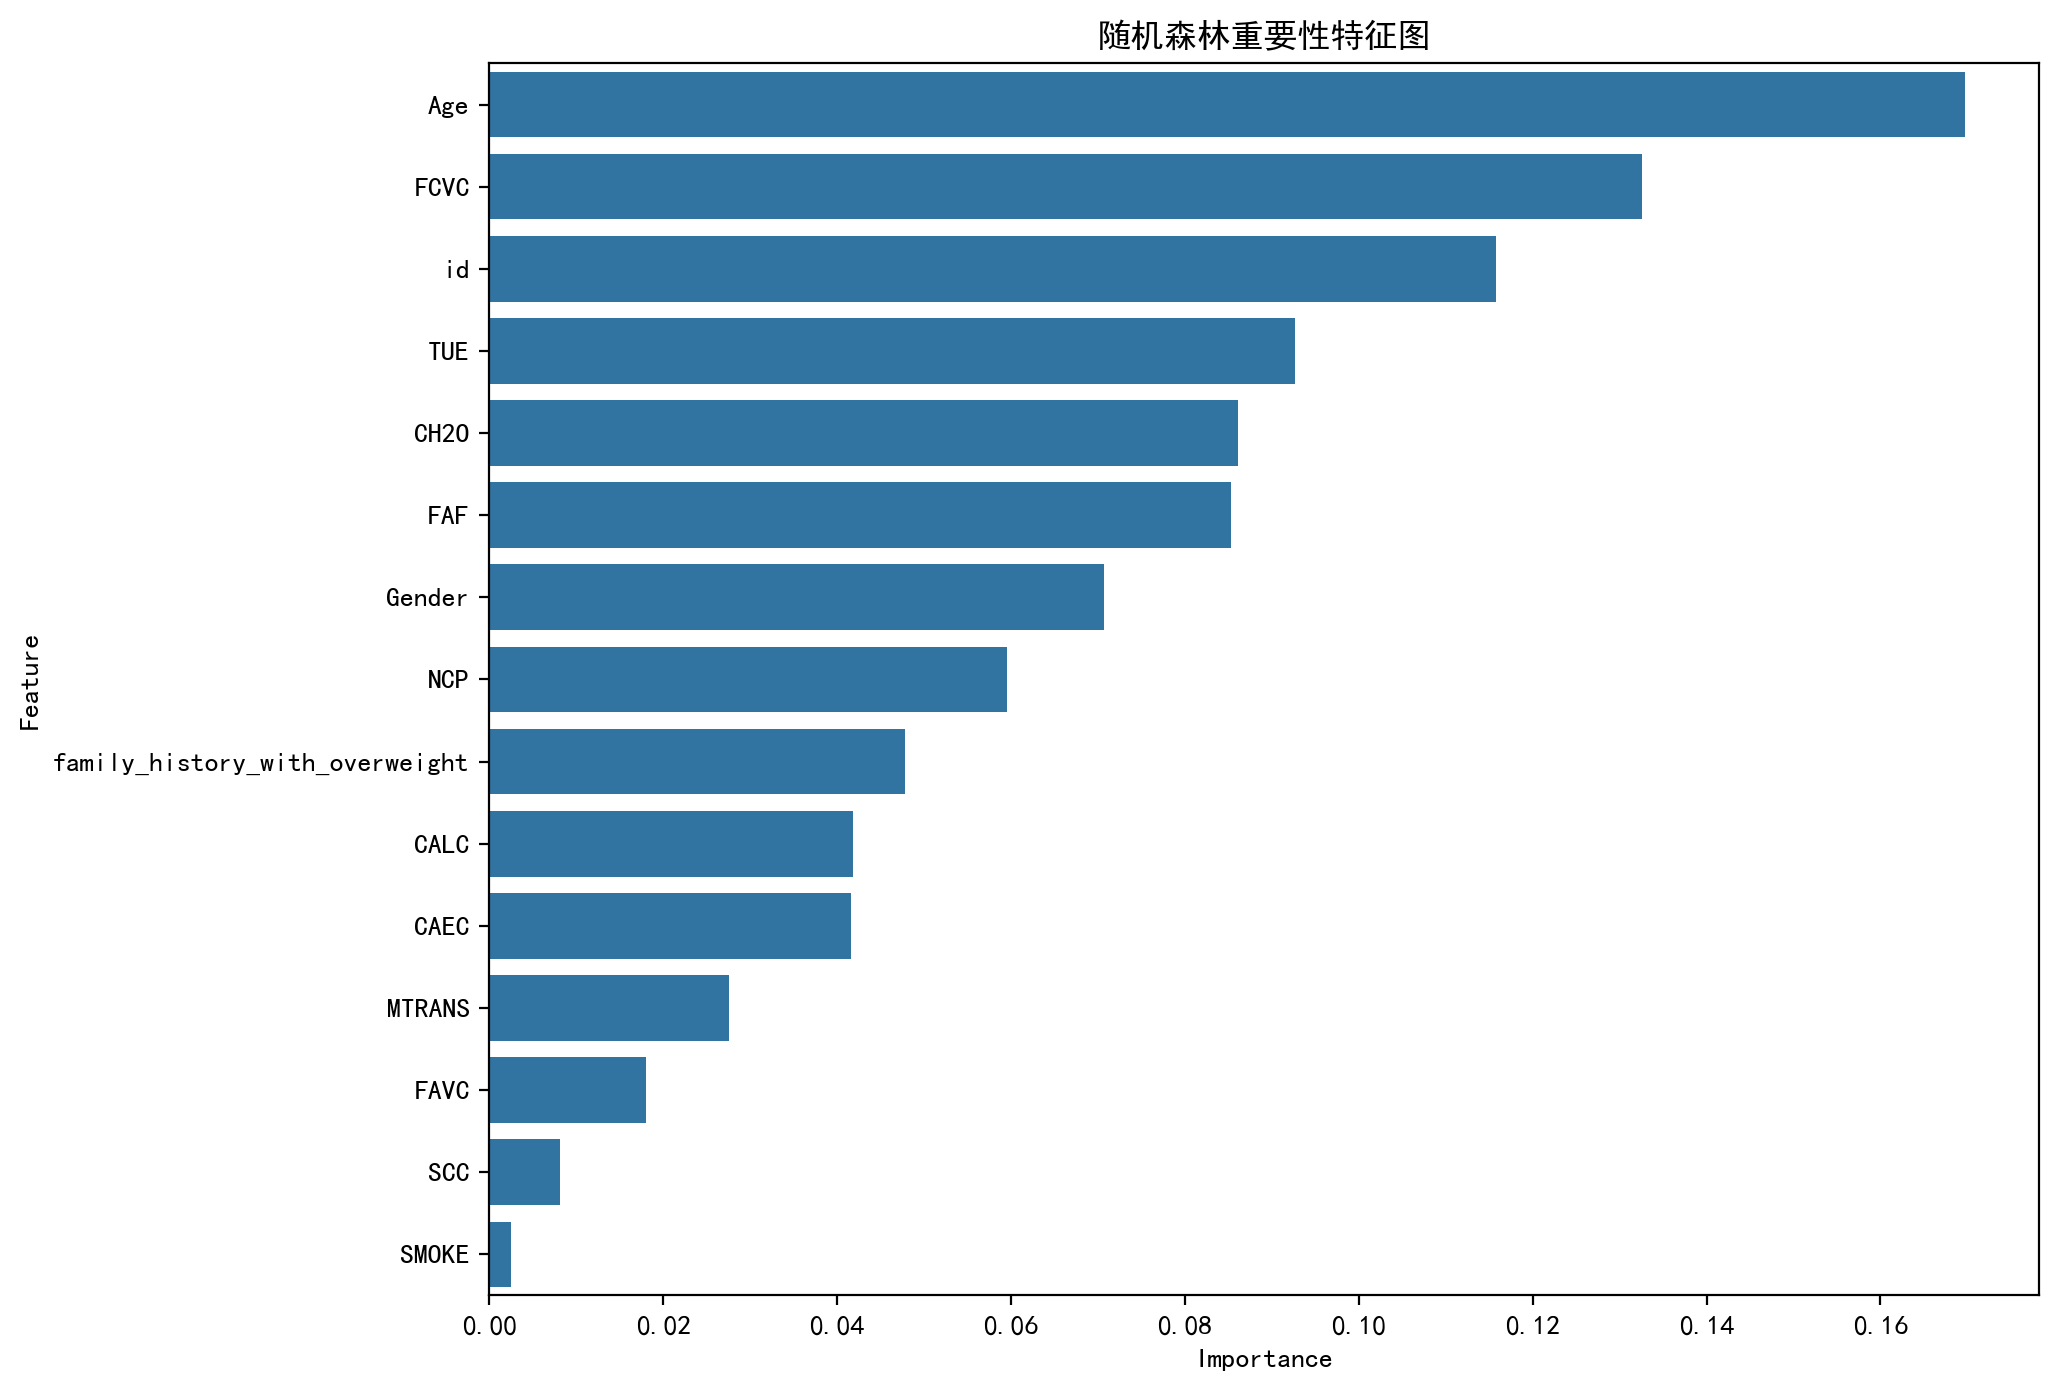

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 
data = pd.read_excel('obesity_level.xlsx')
new_data = data.copy()
new_data.drop([ 'Height', 'Weight'], axis=1, inplace=True)

# 将性别和交通方式转换为数值型
new_data['Gender'] = new_data['Gender'].map({'Female': 0, 'Male': 1})
new_data['MTRANS'] = new_data['MTRANS'].map({'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 'Motorbike': 3, 'Bike': 4})

# 将所有分类特征转换为字符串类型
for col in new_data.select_dtypes(include=['object']).columns:
    new_data[col] = new_data[col].astype(str)

# 对分类特征进行编码
label_encoders = {}
for col in new_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    new_data[col] = le.fit_transform(new_data[col].astype(str))
    label_encoders[col] = le

# 分离特征和目标变量
x = new_data.drop('0be1dad', axis=1)  # 特征
y = new_data['0be1dad']  # 目标变量

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)

# 使用随机森林分类器
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)  # 训练模型

# 预测
y_pred = clf.predict(x_test)

# 输出分类报告和准确率
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# 特征重要性
feature_importances = clf.feature_importances_
importances_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('随机森林重要性特征图')
plt.show()

                     precision    recall  f1-score   support

       0rmal_Weight       0.60      0.75      0.67       953
Insufficient_Weight       0.76      0.79      0.77       753
     Obesity_Type_I       0.69      0.69      0.69       894
    Obesity_Type_II       0.83      0.93      0.87       963
   Obesity_Type_III       0.99      1.00      0.99      1157
 Overweight_Level_I       0.61      0.44      0.52       743
Overweight_Level_II       0.60      0.46      0.52       765

           accuracy                           0.75      6228
          macro avg       0.73      0.72      0.72      6228
       weighted avg       0.74      0.75      0.74      6228

Accuracy: 0.7471098265895953


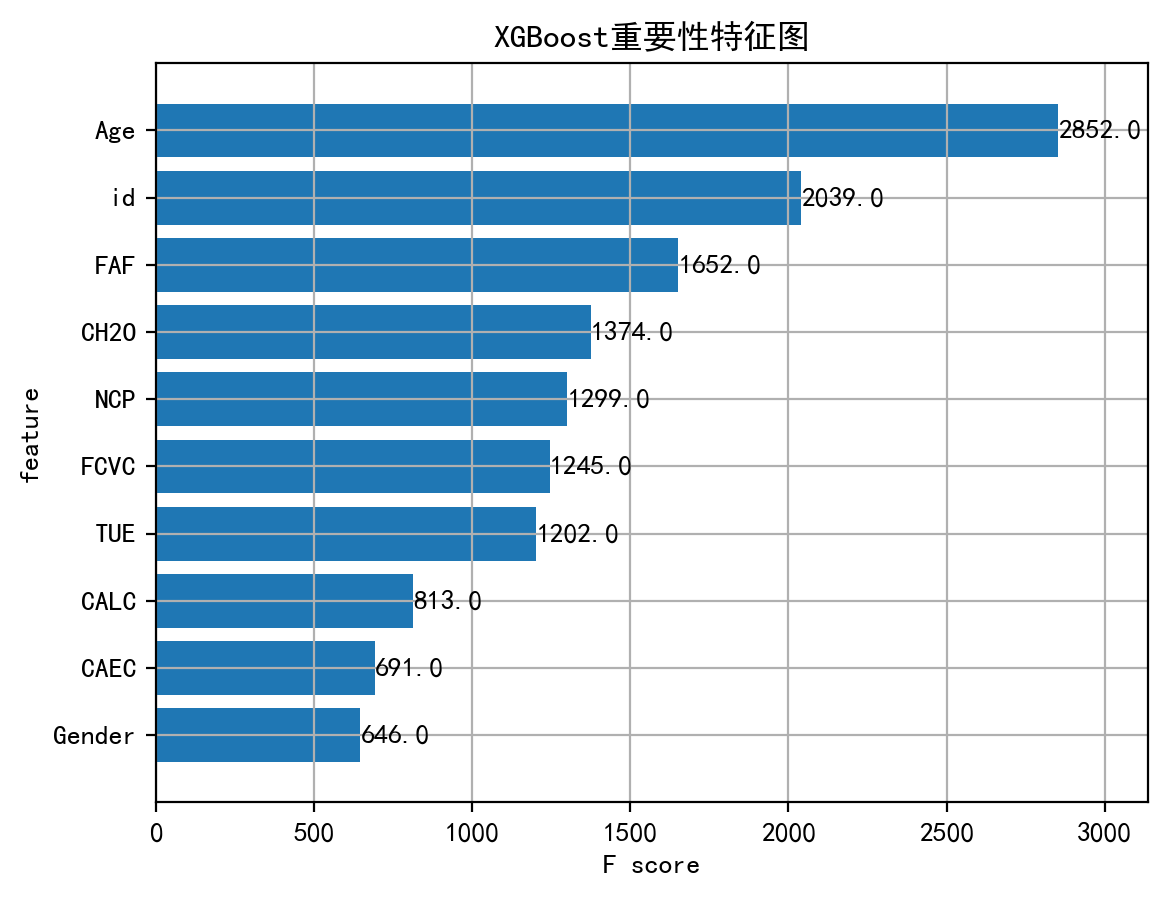

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 
data = pd.read_excel('obesity_level.xlsx')
new_data = data.copy()
new_data.drop([ 'Height','Weight'], axis=1, inplace=True)
new_data['Gender'] = new_data['Gender'].map({'Female': 0, 'Male': 1})
new_data['MTRANS'] = new_data['MTRANS'].map({'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 'Motorbike': 3, 'Bike': 4})

# 将目标变量转换为整数标签
le = LabelEncoder()
new_data['0be1dad'] = le.fit_transform(new_data['0be1dad'])

# 将CAEC和CALC列转换为分类类型
new_data['CAEC'] = new_data['CAEC'].astype('category')
new_data['CALC'] = new_data['CALC'].astype('category')

# 假设'0be1dad'是肥胖等级的列名
x = new_data.drop('0be1dad', axis=1, errors='ignore')
y = new_data['0be1dad']

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)

# 使用XGBoost模型
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(le.classes_), learning_rate=0.1, n_estimators=100, max_depth=5, random_state=15, enable_categorical=True)

# 训练模型
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

report = classification_report(y_test, y_pred, target_names=le.classes_)
print(report)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

xgb.plot_importance(model, height=0.8, title='XGBoost重要性特征图', ylabel='feature', max_num_features=10)
plt.show()